In [20]:
import numpy as np
import pandas as pd
import requests
from sklearn.impute import SimpleImputer
import seaborn.objects as so
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://data.cityofchicago.org/resource/n4bx-5kf6.json'

In [3]:
# make get request for city of chicago salary data
r = requests.get(url)

In [4]:
# check response is 200
r

<Response [200]>

In [5]:
# save json content to dataframe
json = r.json()

In [6]:
salary_df = pd.DataFrame(json)

In [7]:
salary_df.head()

,name,job_titles,department,full_or_part_time,salary_or_hourly,annual_salary,frequency_description,hourly_rate
0,"AARON, JEFFERY M",LIEUTENANT,DEPARTMENT OF POLICE,F,SALARY,141552,NaN,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),DEPARTMENT OF POLICE,F,SALARY,113568,NaN,NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,DEPT OF WATER MANAGEMENT,F,SALARY,129540,NaN,NaN
3,"ABARCA-COMPTON, RUTH A",ATTORNEY,DEPARTMENT OF PUBLIC HEALTH,F,SALARY,117816,NaN,NaN
4,"ABARCA, EMMANUEL",CONCRETE LABORER,CHICAGO DEPT OF TRANSPORTATION,F,HOURLY,NaN,40,48.9


In [8]:
# How much data is missing? 
salary_df.isna().sum()

name                       0
job_titles                 0
department                 0
full_or_part_time          0
salary_or_hourly           0
annual_salary            176
frequency_description    824
hourly_rate              824
dtype: int64

In [9]:
# Check dtypes
salary_df.dtypes

name                     object
job_titles               object
department               object
full_or_part_time        object
salary_or_hourly         object
annual_salary            object
frequency_description    object
hourly_rate              object
dtype: object

In [10]:
# convert numeric columns to float
salary_df_numeric_cols = ['annual_salary', 'frequency_description','hourly_rate']
salary_df[salary_df_numeric_cols] = salary_df[salary_df_numeric_cols].apply(pd.to_numeric, errors='coerce')
salary_df.dtypes

name                      object
job_titles                object
department                object
full_or_part_time         object
salary_or_hourly          object
annual_salary            float64
frequency_description    float64
hourly_rate              float64
dtype: object

In [11]:
# create two dataframes for salaried and hourly workers
# dataframe for hourly workers only
hrly_salary_df = salary_df[salary_df["salary_or_hourly"]=="HOURLY"].copy()
#dataframe for salaried workers only
annual_salary_df = salary_df[salary_df["salary_or_hourly"]=="SALARY"].copy()

In [12]:
#check for full-timer workers with "HOURLY" pay and annualize 52 weeks of pay for 40hr work weeks
hrly_salary_df["annual_salary"]=[float(x) for x in (hrly_salary_df["hourly_rate"]*hrly_salary_df["frequency_description"]*52)]

<h2>Annualized income for full-time hourly workers</h2>

<p>Lowest pay (annualized income) for full-time hourly workers</p>

In [13]:
hrly_salary_df[hrly_salary_df["annual_salary"]==hrly_salary_df["annual_salary"].min()]

,name,job_titles,department,full_or_part_time,salary_or_hourly,annual_salary,frequency_description,hourly_rate
209,"AGUAYO, REY D",CUSTODIAL WORKER,DEPARTMENT OF AVIATION,F,HOURLY,34736.0,40.0,16.7
210,"AGUAYO, ROMEO D",CUSTODIAL WORKER,DEPARTMENT OF AVIATION,F,HOURLY,34736.0,40.0,16.7


<p>Highest pay (annualized income) for full-time hourly workers</p>

In [14]:
hrly_salary_df[hrly_salary_df["annual_salary"]==hrly_salary_df["annual_salary"].max()]

,name,job_titles,department,full_or_part_time,salary_or_hourly,annual_salary,frequency_description,hourly_rate
669,"AMEDIO, ANTHONY",ASST CHIEF OPERATING ENGINEER,DEPT OF WATER MANAGEMENT,F,HOURLY,131289.6,40.0,63.12
774,"ANDERSON, TARIQ A",ASST CHIEF OPERATING ENGINEER,DEPT OF WATER MANAGEMENT,F,HOURLY,131289.6,40.0,63.12
990,"ARREDONDO, GABRIEL",ASST CHIEF OPERATING ENGINEER,DEPT OF WATER MANAGEMENT,F,HOURLY,131289.6,40.0,63.12


<h2>Salary income for full-time salaried workers</h2>

<p>Lowest pay (salary income) for full-time hourly workers</p>

In [15]:
annual_salary_df[annual_salary_df["annual_salary"]==annual_salary_df["annual_salary"].min()]

,name,job_titles,department,full_or_part_time,salary_or_hourly,annual_salary,frequency_description,hourly_rate
170,"ADELMAN, BRUCE E",LEGISLATIVE AIDE,CITY COUNCIL,F,SALARY,22920.0,NaN,NaN


<p>Highest pay (salary income) for full-time hourly workers</p>

In [16]:
annual_salary_df[annual_salary_df["annual_salary"]==annual_salary_df["annual_salary"].max()]

,name,job_titles,department,full_or_part_time,salary_or_hourly,annual_salary,frequency_description,hourly_rate
95,"ACHILLES, AMBER L",MANAGING DEPUTY COMMISSIONER,DEPARTMENT OF AVIATION,F,SALARY,190044.0,NaN,NaN


<h2>Plot Interquartile Range and Outliers</h2>

<h4>Box plot of Hourly Employees</h4>
<p>Most outliers are less than the lower limit.</p>

<Axes: xlabel='annual_salary', ylabel='department'>

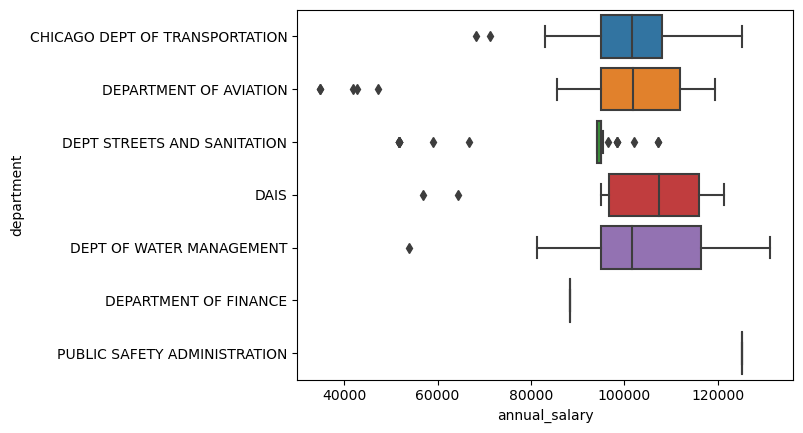

In [37]:
fig, axs = plt.subplots()
sns.boxplot(x='annual_salary', y='department', data=hrly_salary_df, ax=axs)


<h4>Box plot of Saleried Employees</h4>
<p>Most outliers are greater than the upper limit.</p>

<Axes: xlabel='annual_salary', ylabel='department'>

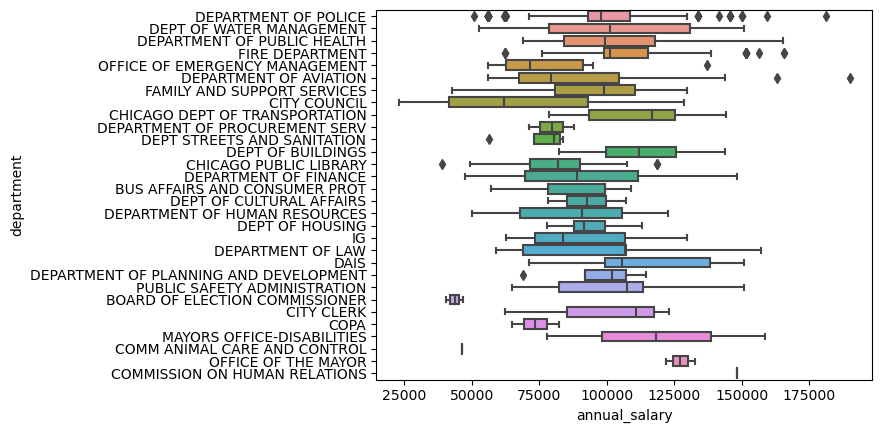

In [38]:
fig, axs = plt.subplots()
sns.boxplot(x='annual_salary',y='department', data=annual_salary_df, ax=axs)